In [1]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 第一题
def MySinh(x,N=1000,epsi=1.0e-5):
    fac = 1 # denominator
    res = 0 # output
    prod = 1 # x ^ n
    index = 1 # 

    for i in range(1, 2 * N + 1, 2):
        while index < i + 1:
            prod *= x
            fac *= index
            index += 1
        res += prod / fac
    
    return res
# test
t = [0.1,1.0,10.0,100.0]
for v in t:
    print("MySinh({v}, 30) = {res}".format(v=v,res=MySinh(v, 30)))
    print("np.sinh({v}) = {res}".format(v=v,res=np.sinh(v)))

MySinh(0.1, 30) = 0.10016675001984403
np.sinh(0.1) = 0.10016675001984403
MySinh(1.0, 30) = 1.1752011936438016
np.sinh(1.0) = 1.1752011936438014
MySinh(10.0, 30) = 11013.232874703395
np.sinh(10.0) = 11013.232874703393
MySinh(100.0, 30) = 1.0785540907133189e+38
np.sinh(100.0) = 1.3440585709080678e+43


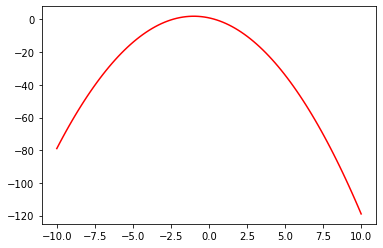

In [3]:
# 第二题
def quadratic(f, x1, x2, x3):
    (f1, f2, f3) = (f(x1), f(x2), f(x3))
    f_mat = np.array([[f1], [f2], [f3]])
    
    mat = np.array([[x1 * x1, x2 * x2, x3 * x3], [x1, x2, x3], [1, 1, 1]])
    mat = np.matrix.transpose(mat)
    mat = np.linalg.inv(mat)

    coes = np.matmul(mat, f_mat).tolist()
    return (lambda x: x * x * coes[0] + x * coes[1] + coes[2])

def plot_quadratic():
    x = np.linspace(-10, 10, 100)
    f = quadratic(lambda x: - x * x - 2 * x + 1, -1, 0, 1)
    plt.plot(x, f(x), color='red')
    plt.show()
plot_quadratic()

In [4]:
# 第三题(1)

z0 = 1.0000000e-01
z = [i * z0 for i in range(1, 11)]
X1 = [
        4.3327843e+02,
        8.4565604e+02,
        1.2367089e+03,
        1.6065104e+03,
        1.9555308e+03,
        2.2845323e+03,
        2.5944725e+03,
        2.8864243e+03,
        3.1615125e+03,
        3.4208678e+03
    ]
X2 = [
    4.3490824e+02,
    8.5199526e+02,
    1.2504843e+03,
    1.6300282e+03,
    1.9906572e+03,
    2.3327094e+03,
    2.6567584e+03,
    2.9635438e+03,
    3.2539121e+03,
    3.5287680e+03
]

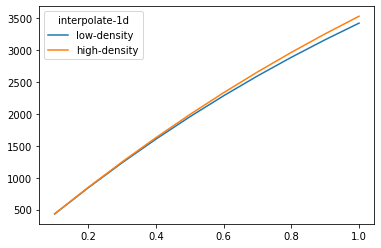

In [5]:
# 第三题 (2)

p1 = interpolate.interp1d(z, X1)
p2 = interpolate.interp1d(z, X2)

plt.plot(z, p1(z), '-', label = "low-density")
plt.plot(z, p2(z), '-', label = "high-density")
plt.legend(title="interpolate-1d")
plt.show()

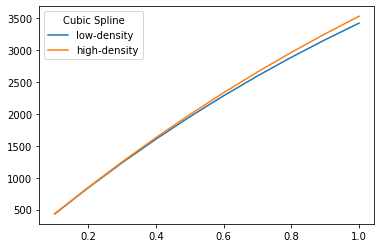

In [6]:
# 第三题 (3)

c1 = interpolate.CubicSpline(z, X1)
c2 = interpolate.CubicSpline(z, X2)

plt.plot(z, c1(z), '-', label = "low-density")
plt.plot(z, c2(z), '-', label = "high-density")
plt.legend(title="Cubic Spline")
plt.show()

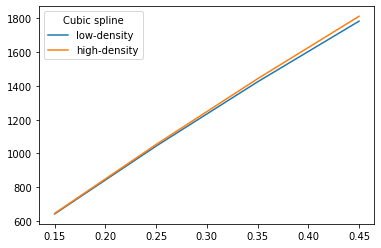

In [7]:
# 第三题 (4)

plt.clf()
z0 = [0.15, 0.25, 0.35, 0.45]
plt.plot(z0, c1(z0), '-', label = "low-density")
plt.plot(z0, c2(z0), '-', label = "high-density")
plt.legend(title = "Cubic spline")
plt.show()

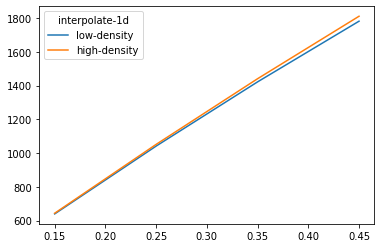

In [8]:
plt.clf()
plt.plot(z0, p1(z0), '-', label = "low-density")
plt.plot(z0, p2(z0), '-', label = "high-density")
plt.legend(title = "interpolate-1d")
plt.show()